In [1]:
import matplotlib.pyplot as plt

def show_object_and_mask(img_obj_RGB, img_obj_alpha):
    
    if img_obj_RGB is not None and img_obj_alpha is not None:
        plt.subplot(1, 2, 1)
        plt.imshow(img_obj_RGB)
        plt.title('Color Image')
        plt.subplot(1, 2, 2)
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Alpha Channel Grayscale Image')
        plt.show()
    
    elif img_obj_RGB is None:
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Alpha Channel Grayscale Image')
        plt.show()

    else:
        plt.imshow(img_obj_RGB)
        plt.title('Color Image')
        plt.show()

In [2]:
from augmentation import AugmentationGenerator
from config import config_paste_parameters

auger = AugmentationGenerator(**config_paste_parameters['aug_params'])

initialized and loading cut images ...
load cut images for cylinder ...


100%|██████████| 36/36 [00:07<00:00,  4.67it/s]


load cut images for plate ...


100%|██████████| 45/45 [00:08<00:00,  5.04it/s]


load cut images for usb ...


100%|██████████| 51/51 [00:09<00:00,  5.55it/s]


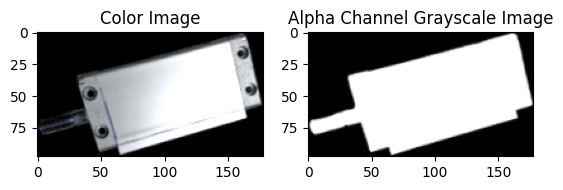

In [120]:
import numpy as np
import random

obj_choice = np.random.randint(0, len(auger.src_imgs))
scale = random.uniform(auger.min_scale_factor, auger.max_scale_factor)

obj = auger.img_aug(obj_choice, scale)

show_object_and_mask(obj[:, :, :3], obj[:, :, 3])

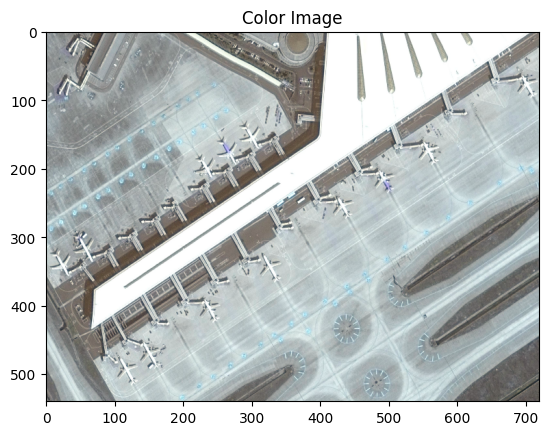

In [152]:
from handling import load_canvas
import os

imgcan = load_canvas(os.path.join(auger.source_root, '01_canvas'), 720, 540)

show_object_and_mask(imgcan[:, :, :3], None)

In [153]:
obj_rgb = (obj[:, :, :3]*255).astype(np.uint8)
mask = (obj[:, :, 3]*255).astype(np.uint8)
imgcan = (imgcan[:, :, :3]*255).astype(np.uint8)

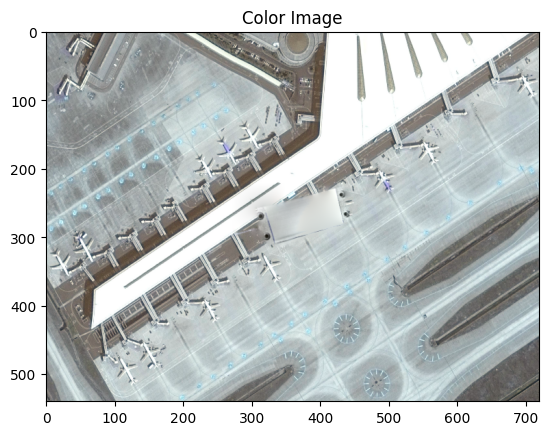

In [154]:
import cv2

out = cv2.seamlessClone(src=obj_rgb, dst=imgcan, mask=mask, p=(720//2, 540//2), flags=cv2.NORMAL_CLONE)
show_object_and_mask(out, None)